In [395]:
import pandas as pd
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [305]:
df = pd.read_excel("chapter-12-relay-foods.xlsx", sheetname = "Purchase Data - Full Study")

In [306]:
def converttomonth(timestamp):
    newdate = timestamp.to_datetime().strftime('%Y-%m')
    return newdate

In [307]:
df["OrderPeriod"]=df["OrderDate"].apply(converttomonth)

/usr/local/lib/python3.5/site-packages/pandas/core/series.py:2292: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [308]:
del df["OrderDate"]

In [309]:
df = df[["OrderId", "OrderPeriod", "UserId", "TotalCharges", "CommonId", "PupId", "PickupDate"]]

In [310]:
df

,OrderId,OrderPeriod,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01,47,50.6700,TRQKD,2,2009-01-12
1,278,2009-01,47,26.6000,4HH2S,3,2009-01-20
2,294,2009-02,47,38.7100,3TRDC,2,2009-02-04
3,301,2009-02,47,53.3800,NGAZJ,2,2009-02-09
4,302,2009-02,47,14.2800,FFYHD,2,2009-02-09
5,321,2009-02,47,29.5000,HA5R3,3,2009-02-17
6,333,2009-02,47,18.9100,RSXQG,2,2009-02-23
7,341,2009-03,47,64.4100,KHBDJ,3,2009-03-03
8,353,2009-03,47,18.0300,T7SUN,3,2009-03-10
9,373,2009-03,47,25.5500,KMF5X,3,2009-03-17


In [311]:
cohortgroup = {}
counted = []
for i in df.OrderPeriod.unique():
    cohortgroup[i] = []
    for j in df[df.OrderPeriod == i].UserId.unique():
        if j not in counted:
            cohortgroup[i].append(j)
            counted.append(j)

In [312]:
def cohortperiod(userid):
    for key in cohortgroup.keys():
        if userid in cohortgroup[key]:
            return key

In [313]:
df["CohortGroup"] = df["UserId"].apply(cohortperiod)

In [314]:
df

,OrderId,OrderPeriod,UserId,TotalCharges,CommonId,PupId,PickupDate,CohortGroup
0,262,2009-01,47,50.6700,TRQKD,2,2009-01-12,2009-01
1,278,2009-01,47,26.6000,4HH2S,3,2009-01-20,2009-01
2,294,2009-02,47,38.7100,3TRDC,2,2009-02-04,2009-01
3,301,2009-02,47,53.3800,NGAZJ,2,2009-02-09,2009-01
4,302,2009-02,47,14.2800,FFYHD,2,2009-02-09,2009-01
5,321,2009-02,47,29.5000,HA5R3,3,2009-02-17,2009-01
6,333,2009-02,47,18.9100,RSXQG,2,2009-02-23,2009-01
7,341,2009-03,47,64.4100,KHBDJ,3,2009-03-03,2009-01
8,353,2009-03,47,18.0300,T7SUN,3,2009-03-10,2009-01
9,373,2009-03,47,25.5500,KMF5X,3,2009-03-17,2009-01


In [315]:
df = df.set_index(["CohortGroup", "OrderPeriod"])

In [316]:
df

OrderId  UserId  TotalCharges CommonId  PupId  \
CohortGroup OrderPeriod                                                  
2009-01     2009-01          262      47       50.6700    TRQKD      2   
            2009-01          278      47       26.6000    4HH2S      3   
            2009-02          294      47       38.7100    3TRDC      2   
            2009-02          301      47       53.3800    NGAZJ      2   
            2009-02          302      47       14.2800    FFYHD      2   
            2009-02          321      47       29.5000    HA5R3      3   
            2009-02          333      47       18.9100    RSXQG      2   
            2009-03          341      47       64.4100    KHBDJ      3   
            2009-03          353      47       18.0300    T7SUN      3   
            2009-03          373      47       25.5500    KMF5X      3   
            2009-03          376      47       13.6400    R57V3      3   
            2009-03          386      47       47.8300    CSH73      3   
            2009-03          398      47       42.1400    3VYSW      3   
            2009-04          431      47       21.7300    XG5NT      3   
            2009-04          441      47       21.7300    JKME3      3   
            2009-04          467      47       17.9700    WVGR5      3   
            2009-04          493      47       28.8500    ARYQJ      3   
            2009-04          494      47        7.1500    QAM9C      3   
            2009-05          517      47       57.7500    CGHAJ      5   
            2009-05          525      47       40.9800    MCDJE      3   
            2009-05          567      47       14.9300    NPVQQ      3   
            2009-05          575      47       14.3200    2T727      3   
            2009-05          598      47       40.7600    ZNDAZ      3   
            2009-05          635      47       83.4100    V8TCD      3   
            2009-06          664      47       47.3900    N2MN4      3   
            2009-06          688      47       16.7600    SQ7AG      5   
            2009-06          720      47       26.7100    VVJMZ      3   
            2009-06          732      47       18.6600    NHPKJ      3   
            2009-06          775      47       46.6500    YGFQ6      4   
            2009-07          828      47       20.2700    XJMBR      6   
...                          ...     ...           ...      ...    ...   
2010-02     2010-02         3052  376775       57.4302    6CTBJ      9   
            2010-03         3227  376775       43.7000    Q53K9      9   
            2010-02         3053  376959       99.3175    YPBDJ      4   
            2010-02         3054  377434       43.5680    HW68T      4   
            2010-02         3059  378828       88.6900    95B8M      4   
            2010-02         3061  379370       53.5080    3F77U     15   
            2010-02         3062  380119       85.8902    SNK4L     15   
            2010-03         3224  380119       56.7115    ZRWZB     15   
            2010-02         3069  382629       46.4500    K4M4E     15   
            2010-03         3195  382629       81.1500    H62FY     18   
            2010-02         3070  382783       60.1900    VQKNA     18   
2010-03     2010-03         3150  382790       66.6002    L5NWN      6   
            2010-03         3096  384031       63.3352    S3CQF      4   
            2010-03         3103  384623       19.0800    EA5M8     12   
            2010-03         3187  384698       44.8518    YJELM     15   
            2010-03         3116  385388       63.4400    QRZFU      7   
            2010-03         3117  385641       14.8900    LKS4A      9   
            2010-03         3140  387360       47.5000    DAVWD      4   
            2010-03         3145  388120       28.7900    FC7SM     15   
            2010-03         3157  389345       26.2600    5VRJ4      5   
            2010-03         3179  390162       57.4100    PM2TV      5   
            2010-03         3

In [317]:
a = df.groupby(level=[0,1])['OrderId'].nunique().to_frame()
a['totaluser'] = df.groupby(level=[0,1])['UserId'].nunique()
a['totalcharge'] = df.groupby(level=[0,1])['TotalCharges'].sum()

In [318]:
a.columns = ['Total Order', 'Total User', 'Total Charges']
a

Total Order  Total User  Total Charges
CohortGroup OrderPeriod                                        
2009-01     2009-01               30          22      1850.2550
            2009-02               25           8      1351.0650
            2009-03               26          10      1357.3600
            2009-04               28           9      1604.5000
            2009-05               26          10      1575.6250
            2009-06               26           8      1384.8400
            2009-07               24           8      1750.8400
            2009-08               21           7      1426.5714
            2009-09               24           7      1964.2755
            2009-10               13           7       860.3292
            2009-11               21           7      1821.8153
            2009-12               22           8      2152.1165
            2010-01               25          11      2084.2236
            2010-02               19           7      2068.7771
            2010-03               12           6      1504.3325
2009-02     2009-02               15          15       666.3100
            2009-03                8           3       501.6100
            2009-04               10           5       968.7800
            2009-05                2           1        53.3600
            2009-06                9           4       758.5200
            2009-07               11           4       667.1000
            2009-08                6           4       314.1752
            2009-09               12           5       567.5057
            2009-10                7           5       328.2800
            2009-11                6           4       738.9359
            2009-12                5           3       263.1971
            2010-01                5           3       550.0098
            2010-02                9           5       734.7613
2009-03     2009-03               18          13       806.3100
            2009-04                6           4       463.8000
...                              ...         ...            ...
2009-08     2010-02               12           4      1595.9906
            2010-03                5           4       478.7787
2009-09     2009-09               44          37      1953.0553
            2009-10               42          15      2433.3013
            2009-11               28          14      1953.2262
            2009-12               20           8      1371.3499
            2010-01               29          13      2262.0346
            2010-02               22           9      1842.9434
            2010-03                9           8       688.6822
2009-10     2009-10               70          54      3802.2525
            2009-11               37          17      1957.8872
            2009-12               27          12      2394.5338
            2010-01               28          13      1952.0574
            2010-02               30          13      1783.1022
            2010-03                9           7       546.0691
2009-11     2009-11              166         130      6738.5869
            2009-12               71          32      5107.4213
            2010-01               59          26      5046.8124
            2010-02               64          29      3486.0959
            2010-03               17          13       961.3681
2009-12     2009-12               88          65      4571.6911
            2010-01               39          17      2565.4410
            2010-02               28          18      1785.7853
            2010-03                8           7       534.0929
2010-01     2010-01              156          95      9677.9032
            2010-02              101          50      8453.1039
            2010-03               31          26      2238.6461
2010-02     2010-02              139         100      7374.7108
            2010-03               19          19       945.9633
2010-03     2010-03               26          24      109

In [354]:
def period(df):
    df['PeriodCohort'] = list(range(1,len(df)+1))
    return df

In [358]:
a= a.groupby(level=0).apply(period)

In [401]:
retention = a.reset_index().pivot(index = "PeriodCohort", columns = "CohortGroup", values = "Total User")

In [402]:
cgsize = a['Total User'].groupby(level=0).first()
cgsize

CohortGroup
2009-01     22
2009-02     15
2009-03     13
2009-04     39
2009-05     50
2009-06     32
2009-07     50
2009-08     31
2009-09     37
2009-10     54
2009-11    130
2009-12     65
2010-01     95
2010-02    100
2010-03     24
Name: Total User, dtype: int64

In [403]:
retention = retention.divide(cgsize, axis = 1)

In [404]:
retention

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
PeriodCohort,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


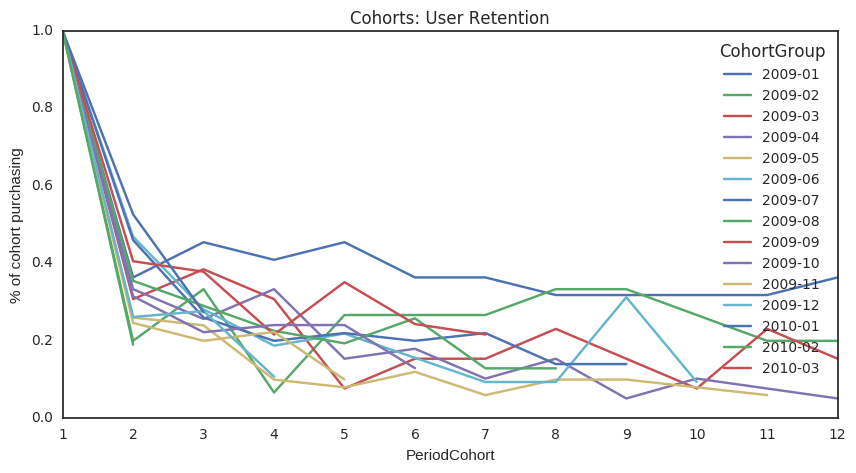

In [405]:
retention.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1,12)
plt.ylabel('% of cohort purchasing')

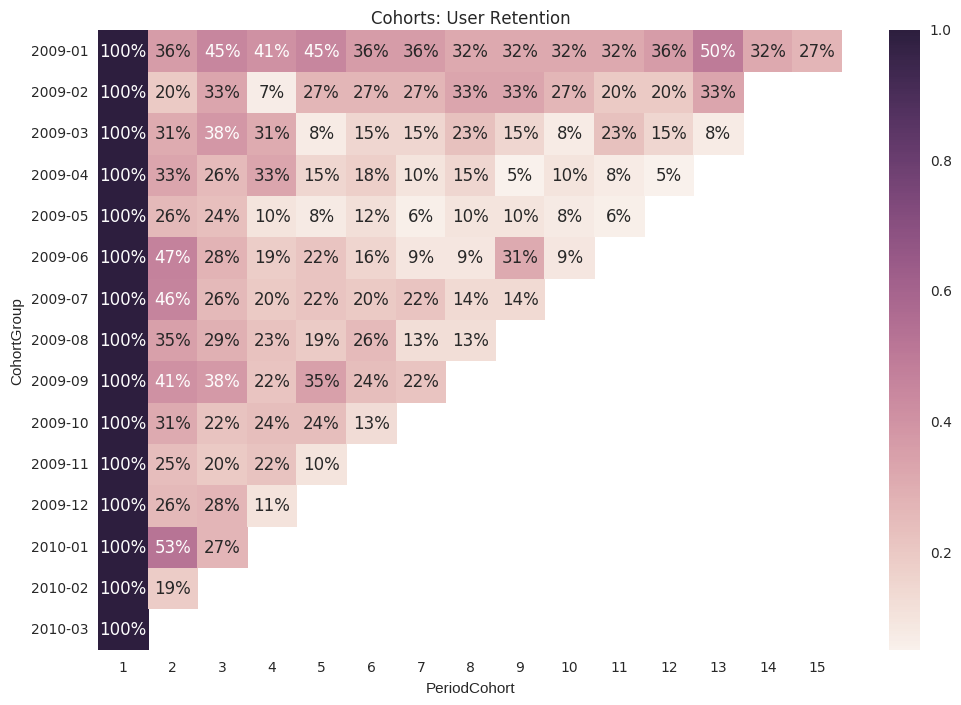

In [406]:
plt.figure(figsize = (12,8))
plt.title('Cohorts: User Retention')
sbn.heatmap(retention.T, mask = retention.T.isnull(), annot = True, fmt = '.0%');